\
<font size = 6 color='black'><b><u><i><center>.5G User Prediction.</b></i></u></center></font>
\
<font size = 5 color='brown'><center>By: Ahmed Metwalli</center></font>

<font size = 6 color='black'><b><i><center>Content</b></i></center></font>
\
\
<font size = 4 ><b>1. Introduction\
    \
    2. Data Explore And Data Wrangling\
    \
    3. Choosing Area Of Interest\
    \
    4. Data Visualization\
    \
    5. Predictions\
    \
    References

### Introduction

Putting machine learning techniques into work in the branch of wireless communication specially 5G is a challenging idea. Since we are looking for low latency and fast computations, we need to build a model that runs fast and performs well as it can be judged by its key metrics. In this report, our aim is to predict that the user is on 5G network or not. This 1000000x60 data is uploaded on Kaggle and can be downloaded from [https://www.kaggle.com/liukunxin/dataset?select=train.csv]. Luckily, me as a communication wireless engineer I had the ability to extract the best features during predictions and create an area of interest during the analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

#Importing Data On Kaggle:
df_sample = pd.read_csv('/kaggle/input/dataset/sample.csv')
df_train = pd.read_csv('/kaggle/input/dataset/train.csv')
df_test = pd.read_csv('/kaggle/input/dataset/test.csv')
df_train.shape, df_test.shape, df_sample.shape

In [3]:
#Importing Data From My Local PC
df_sample = pd.read_csv('sample.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.shape, df_test.shape, df_sample.shape

((700000, 60), (300000, 59), (300000, 2))

## **Data Exploration**

In [4]:
df_train.head()

,prov_id,area_id,user_id,chnl_type,service_type,product_type,innet_months,total_times,total_flux,total_fee,...,active_days20,active_days21,active_days22,active_days23,game_app_flux,live_app_flux,video_app_flux,city_5g_ratio,city_level,is_5g
0,81,V0513400,5f950e1751acd6a6fa9bf88eb5560c78,7,4,5,29,1.149441,10.864754,93.000,...,4.0,2.0,0.0,0.0,0.0,0.00000,5526.494937,0.000512,7.0,1.0
1,36,V0330200,40015dd14b779d1d3d4e8e2536c6115a,7,4,3,5,0.688337,6.814911,89.912,...,2.0,2.0,0.0,0.0,0.0,0.00000,0.000000,0.000356,3.0,0.0
2,76,V0410100,72f4ddd94488cc2f30bc83b82f55d3eb,7,4,4,104,1.102318,9.492543,62.670,...,0.0,3.0,0.0,0.0,0.0,0.00000,1235.091633,0.000490,3.0,0.0
3,84,V0610100,845983a3e7973b0016c73071f4c70c1c,10,4,5,15,0.122139,5.008418,75.798,...,4.0,4.0,0.0,0.0,0.0,9.13548,1194.355876,0.000328,2.0,0.0
4,85,V0520100,0326fbd12145c5378baf5168a8e9c8fe,7,4,3,21,0.158738,9.745640,54.500,...,20.0,0.0,6.0,1.0,0.0,0.00000,26.783371,0.000830,6.0,0.0


In [5]:
df_sample.head(2)

,user_id,is_5g
0,32cd3ea929129a5af90579eb444958fa,0.0
1,e25355ae12b4ebab4427eef6719a5ade,0.0


From these **sample data** which is the y output of **test data**, we should predict the **is_5g** column on **user_id**.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 60 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   prov_id               700000 non-null  int64  
 1   area_id               700000 non-null  object 
 2   user_id               700000 non-null  object 
 3   chnl_type             700000 non-null  int64  
 4   service_type          700000 non-null  int64  
 5   product_type          700000 non-null  int64  
 6   innet_months          700000 non-null  int64  
 7   total_times           700000 non-null  float64
 8   total_flux            700000 non-null  float64
 9   total_fee             700000 non-null  float64
 10  pay_fee               700000 non-null  float64
 11  sex                   700000 non-null  int64  
 12  age                   700000 non-null  int64  
 13  manu_name             700000 non-null  int64  
 14  term_type             700000 non-null  int64  
 15  

#### As we can see from the training df, the data says there are only 2 categorical variables ['area_id','user_id'] which is obviously wrong. Because there are many other columns containing (types) that represent categories. is_5g columns in which I preliminary think that they will be used as if they are categories but with numerical values 0 or 1 (binary classified). And  'prov_id' uniqueness of values (value_counts) should be investigated along with active_days

In [7]:
df_train.prov_id.value_counts(),print(df_train.prov_id.value_counts().count()," Categories")

31  Categories


(51    97107
 76    62130
 17    49123
 11    33978
 34    31601
 91    30000
 18    28877
 74    28620
 71    27986
 84    22657
 81    22483
 89    22063
 19    21580
 36    21529
 31    21486
 38    19144
 85    19137
 30    17999
 90    16365
 83    14618
 97    14577
 10    14280
 59    11750
 13    10052
 86     9181
 75     8511
 87     8351
 50     6447
 70     4909
 88     2318
 79     1141
 Name: prov_id, dtype: int64,
 None)

In [8]:
df_train.area_id.value_counts()

V0110000     33978
V0440100     28544
V0440300     21528
V0310000     21486
V0410100     15301
             ...  
V04601007       30
V04602003       28
V04601008       27
V04600034       13
V0132000         7
Name: area_id, Length: 358, dtype: int64

In [9]:
df_train.user_id.value_counts()

67bab20dffb5fcd66ec75027bff496d9    1
d626e07d4b9bb63fb4f494a9c7fd3006    1
c19d3f29e2c7ccbac75813c88976279e    1
b6ab092af2555389a7672d0c9b009921    1
1314e9f754f2f3043fd4949033d08a78    1
                                   ..
4990e3c24d04e34b0dc1ef957ab5e0b9    1
f8dbf513ae51120bc6e7e8f41fde8483    1
0bae2553b2bb6437d24ab36ea9629a5a    1
6c31ec08407ff2f32dd51b5a0cd426b1    1
93aad82523ec12752ecdfa782abc5133    1
Name: user_id, Length: 700000, dtype: int64

Now we made sure that each user_id is a unique user

In [10]:
df_train.nunique()

prov_id                     31
area_id                    358
user_id                 700000
chnl_type                   10
service_type                 5
product_type                 5
innet_months               286
total_times             452555
total_flux              689445
total_fee               102455
pay_fee                  74943
sex                          2
age                         43
manu_name                   12
term_type                    6
max_rat_flag                 4
is_5g_base_cover             2
is_work_5g_cover             2
is_home_5g_cover             2
is_work_5g_cover_l01         2
is_home_5g_cover_l01         2
is_work_5g_cover_l02         2
is_home_5g_cover_l02         2
activity_type               12
is_act_expire                3
comp_type                    7
call_days                  675
re_call10                 6380
short_call10              4421
long_call10               1864
bank_cnt                  2976
active_days01               31
active_d

In [11]:
df_train.active_days01

0          7.0
1          0.0
2          4.0
3          4.0
4         29.0
          ... 
699995     0.0
699996     5.0
699997    23.0
699998    30.0
699999    27.0
Name: active_days01, Length: 700000, dtype: float64

These active_days columns can be deleted since it would be an unwanted load on our model. Our goal here is to predict is_5g not predict each day for each user to distinguish whether they are using 5g or not.

In [12]:
days=['active_days01', 'active_days02',
       'active_days03', 'active_days04', 'active_days05', 'active_days06',
       'active_days07', 'active_days08', 'active_days09', 'active_days10',
       'active_days11', 'active_days12', 'active_days13', 'active_days14',
       'active_days15', 'active_days16', 'active_days17', 'active_days18',
       'active_days19', 'active_days20', 'active_days21', 'active_days22',
       'active_days23']
df_train.drop(columns=days,inplace=True)
df_test.drop(columns=days,inplace=True)

In [13]:
assert df_train.isnull().sum().sum()==0 , df_test.isnull().sum().sum() == 0

No nulls

In [14]:
false_columns=[]
for i in df_test.columns:
    if i not in df_train.columns:
        false_columns.append(i)

In [15]:
assert false_columns == []

Columns are fine

# **Data Visualization**

#### In this section, I would investigate some of the features using uni, bi and multivariate explorations in order to find what would be the best features to be taken into consideration with is_5g column to use during decision

In [16]:
df_train.columns,df_train.columns.shape[0]

(Index(['prov_id', 'area_id', 'user_id', 'chnl_type', 'service_type',
        'product_type', 'innet_months', 'total_times', 'total_flux',
        'total_fee', 'pay_fee', 'sex', 'age', 'manu_name', 'term_type',
        'max_rat_flag', 'is_5g_base_cover', 'is_work_5g_cover',
        'is_home_5g_cover', 'is_work_5g_cover_l01', 'is_home_5g_cover_l01',
        'is_work_5g_cover_l02', 'is_home_5g_cover_l02', 'activity_type',
        'is_act_expire', 'comp_type', 'call_days', 're_call10', 'short_call10',
        'long_call10', 'bank_cnt', 'game_app_flux', 'live_app_flux',
        'video_app_flux', 'city_5g_ratio', 'city_level', 'is_5g'],
       dtype='object'),
 37)

d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


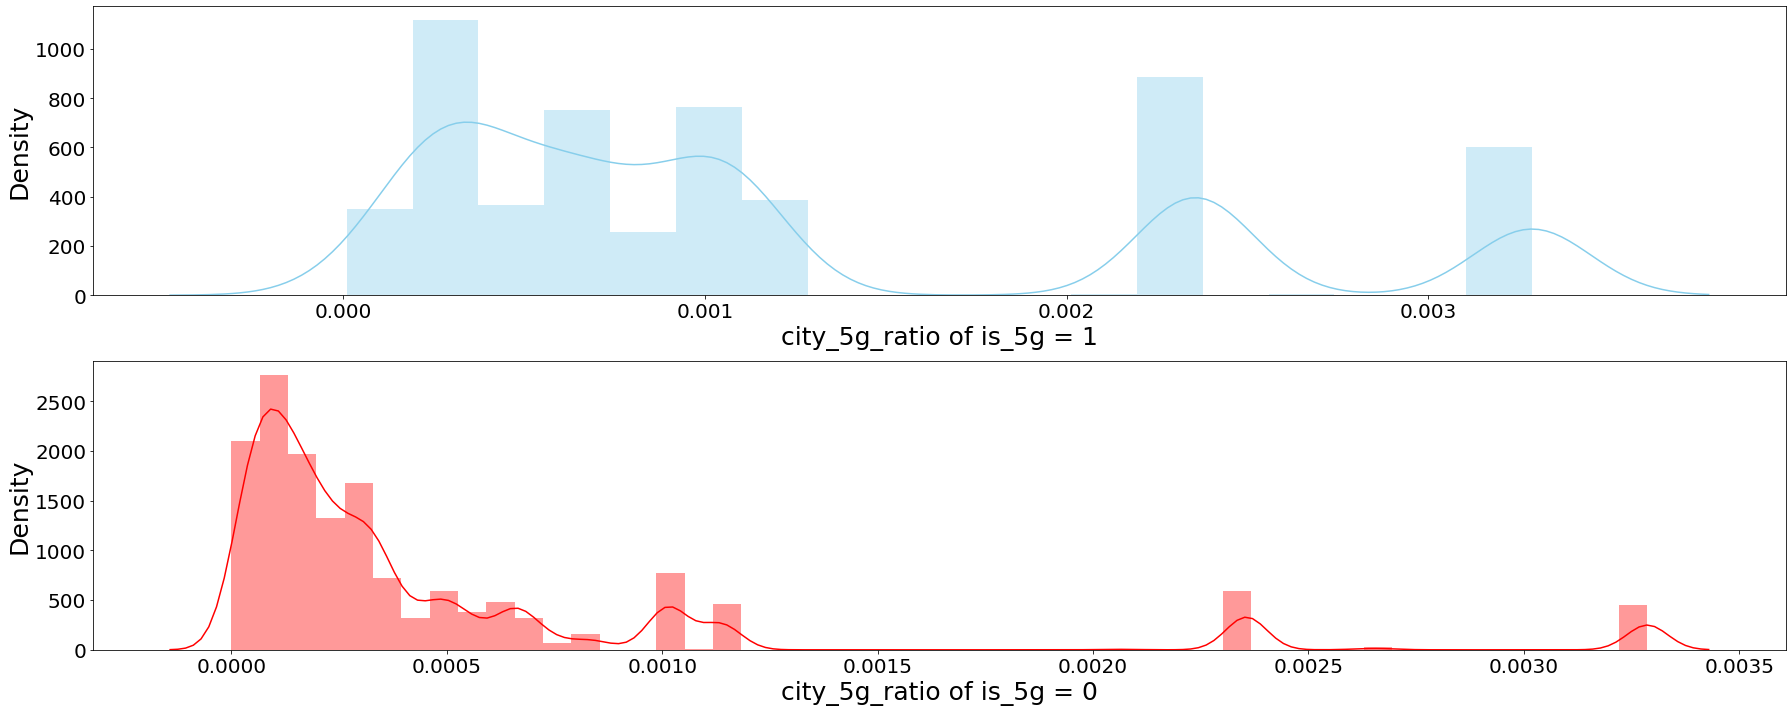

In [17]:
plt.figure(figsize=[25,10])
plt.subplot(2,1,1)
b=sb.distplot(df_train[df_train['is_5g']==1]['city_5g_ratio'],color="skyblue")
b.set_xlabel("city_5g_ratio of is_5g = 1",fontsize=25)
b.set_ylabel("Density",fontsize=25)
b.tick_params(labelsize=20);
plt.subplot(2,1,2)
b=sb.distplot(df_train[df_train['is_5g']==0]['city_5g_ratio'],color="red")
b.set_xlabel("city_5g_ratio of is_5g = 0",fontsize=25)
b.set_ylabel("Density",fontsize=25)
b.tick_params(labelsize=20)
plt.tight_layout();

As we can see that for is_5g = 0 the city_5g_ratio is the most probable accross all of the city_5g_ratios.

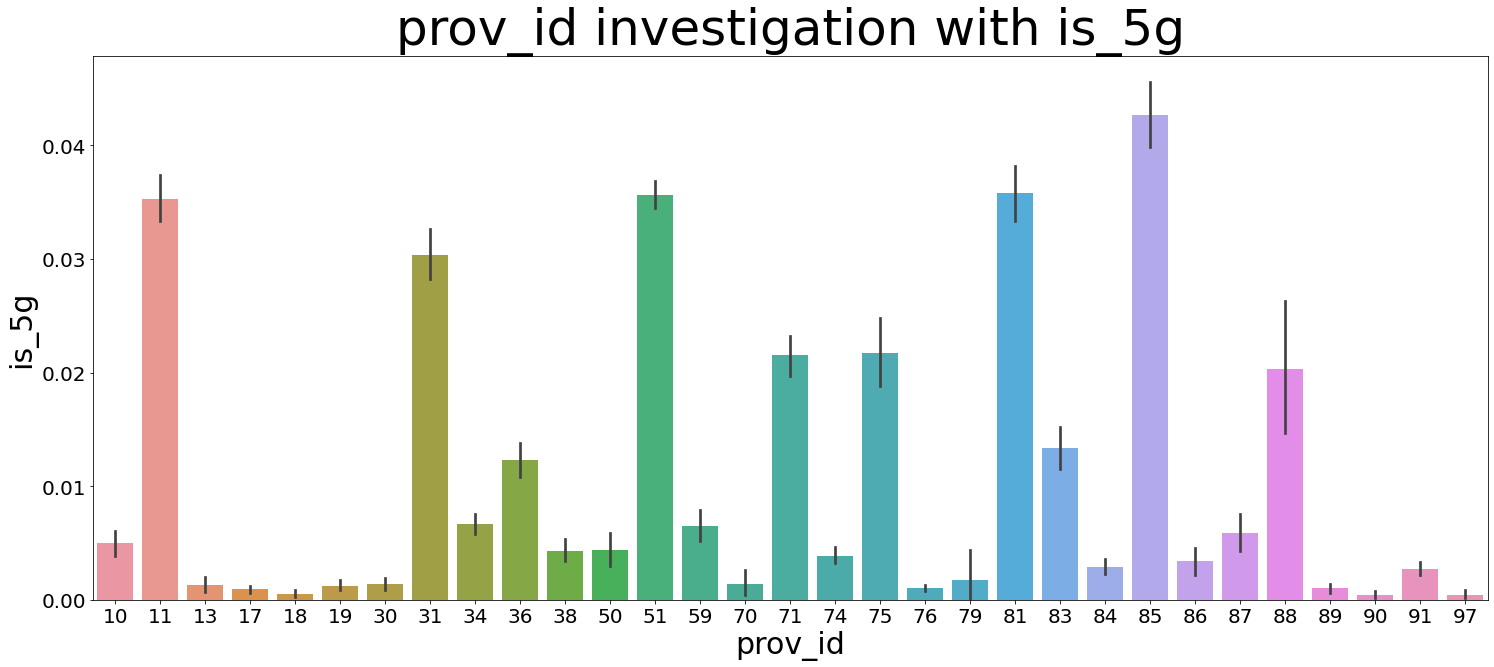

In [18]:
plt.figure(figsize=[25,10])
b=sb.barplot(x="prov_id", y="is_5g", data=df_train)
b.axes.set_title("prov_id investigation with is_5g",fontsize=50)
b.set_xlabel("prov_id",fontsize=30)
b.set_ylabel("is_5g",fontsize=30)
b.tick_params(labelsize=20);

It seems that **85,81,51,31,11** prov_ids are having the highest density (is_5g)

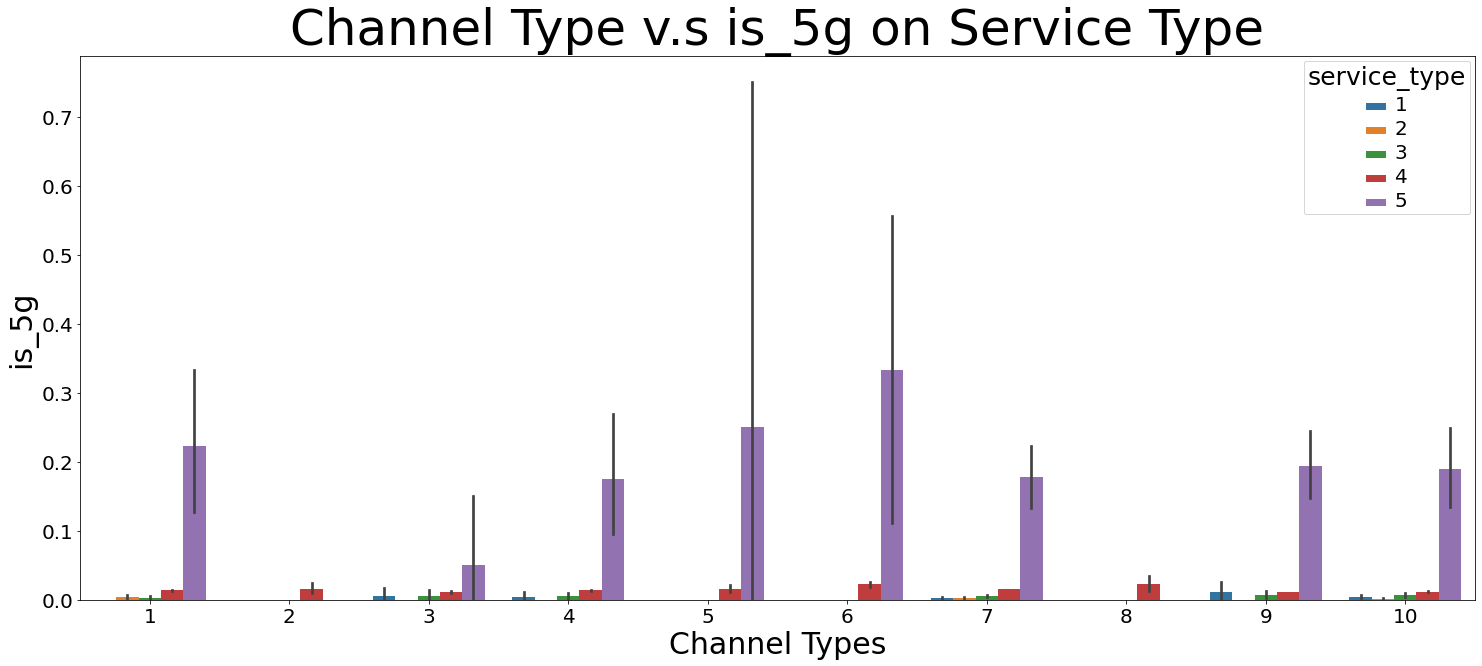

In [19]:
plt.figure(figsize=[25,10])
b=sb.barplot(x="chnl_type", y="is_5g", hue='service_type', data=df_train)
b.axes.set_title("Channel Type v.s is_5g on Service Type",fontsize=50)
b.set_xlabel("Channel Types",fontsize=30)
b.set_ylabel("is_5g",fontsize=30)
b.tick_params(labelsize=20)
plt.setp(b.get_legend().get_texts(), fontsize='20')
plt.setp(b.get_legend().get_title(), fontsize='25');

**Service Type 5** is the most common one across each channel type from 1 to 10 in terms of is_5g probability

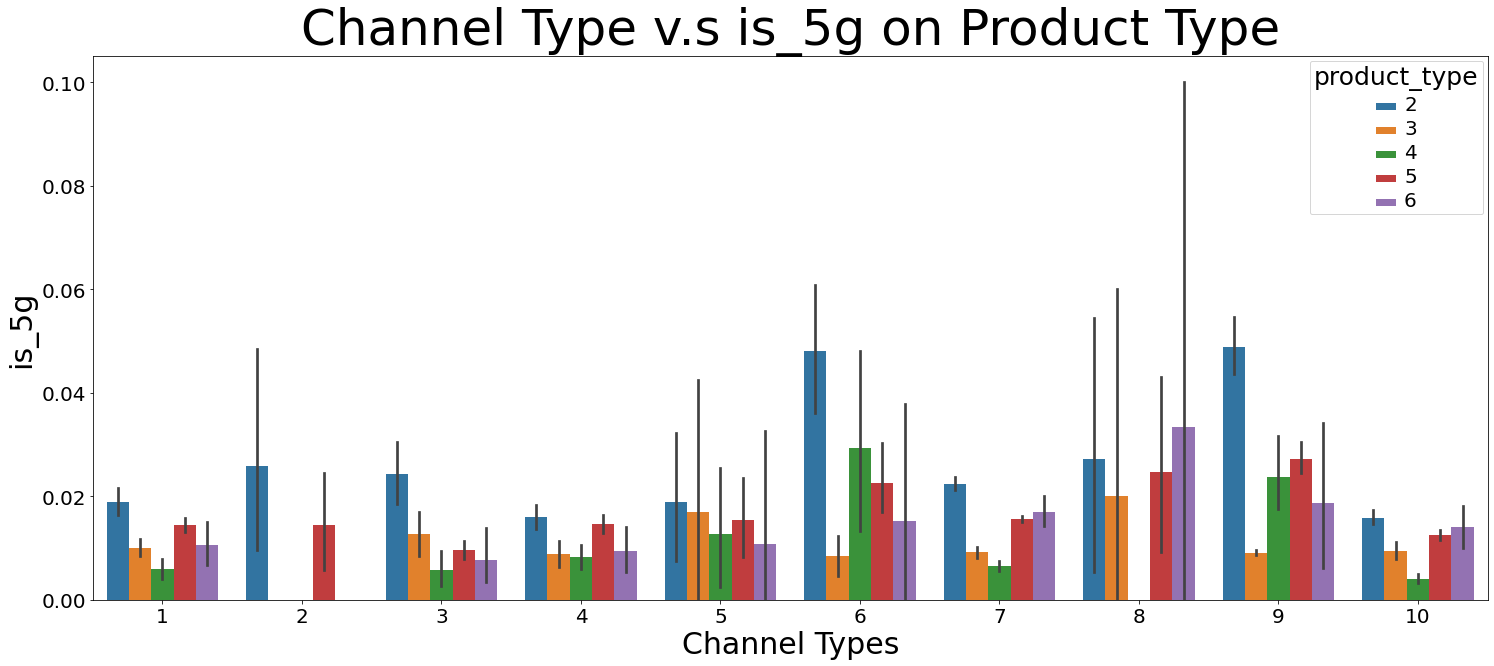

In [20]:
plt.figure(figsize=[25,10])
b=sb.barplot(x="chnl_type", y="is_5g", hue='product_type', data=df_train)
b.axes.set_title("Channel Type v.s is_5g on Product Type",fontsize=50)
b.set_xlabel("Channel Types",fontsize=30)
b.set_ylabel("is_5g",fontsize=30)
b.tick_params(labelsize=20)
plt.setp(b.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(b.get_legend().get_title(), fontsize='25'); # for legend title

**Product Type 5** is the most common one across each channel type from 1 to 10 in terms of is_5g probability

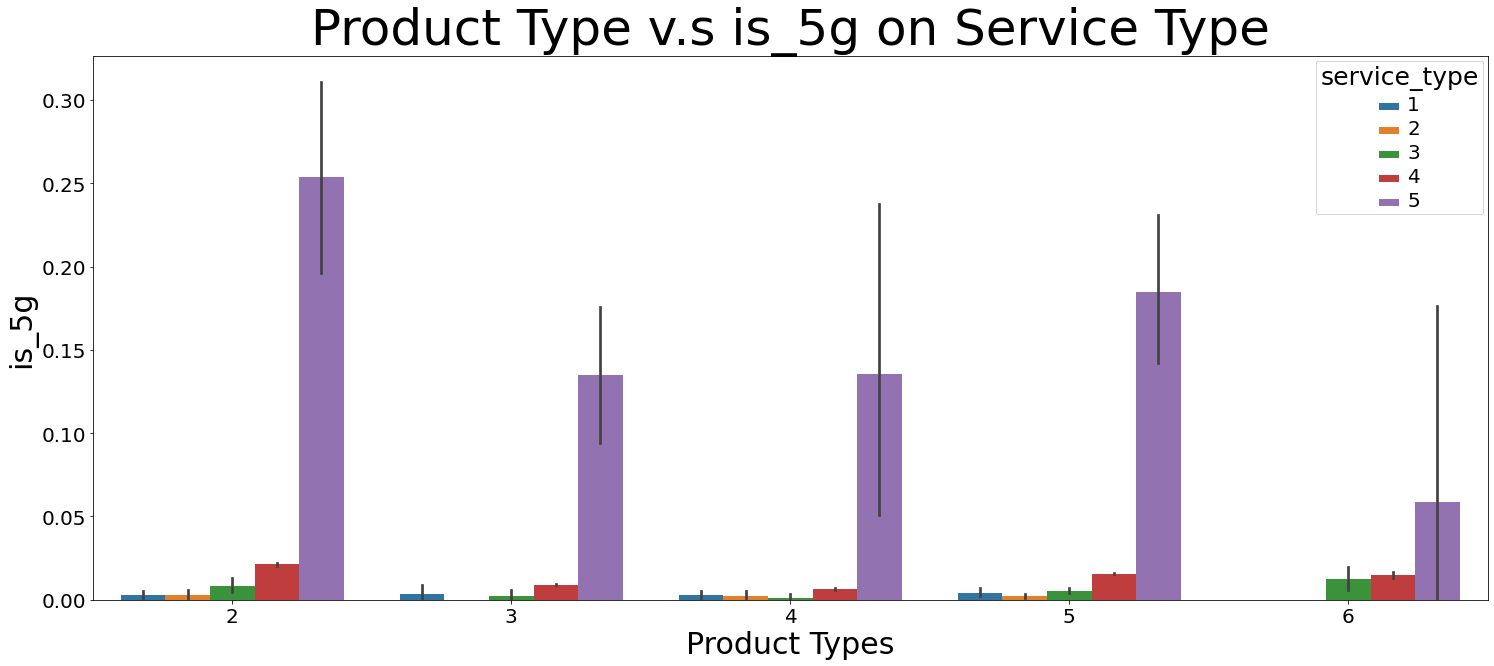

In [21]:
plt.figure(figsize=[25,10])
b=sb.barplot(x="product_type", y="is_5g", hue='service_type', data=df_train)
b.axes.set_title("Product Type v.s is_5g on Service Type",fontsize=50)
b.set_xlabel("Product Types",fontsize=30)
b.set_ylabel("is_5g",fontsize=30)
b.tick_params(labelsize=20)
plt.setp(b.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(b.get_legend().get_title(), fontsize='25'); # for legend title

**Product Type 5** is also the most common one across each product type from 2 to 6 in terms of is_5g probability

<font size=5 color='indigo'> **Product, Channel and Service** types mainly will be taken into consideration since they are giving high amount of information that can be used during classifications

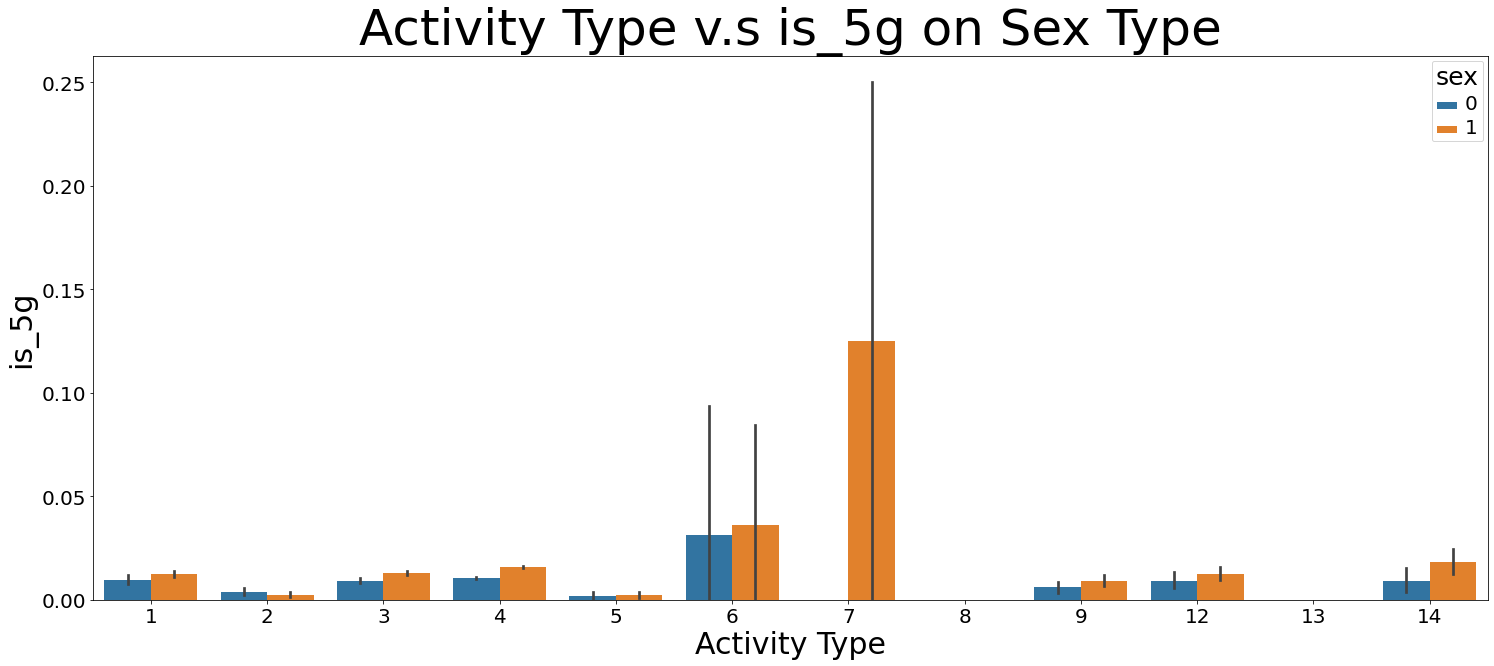

In [22]:
plt.figure(figsize=[25,10])
b=sb.barplot(x="activity_type", y="is_5g", hue='sex', data=df_train)
b.axes.set_title("Activity Type v.s is_5g on Sex Type",fontsize=50)
b.set_xlabel("Activity Type",fontsize=30)
b.set_ylabel("is_5g",fontsize=30)
b.tick_params(labelsize=20)
plt.setp(b.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(b.get_legend().get_title(), fontsize='25'); # for legend title

**Activity Type 7** is made by only 1 sec type and it is the most common one impacting on 5g

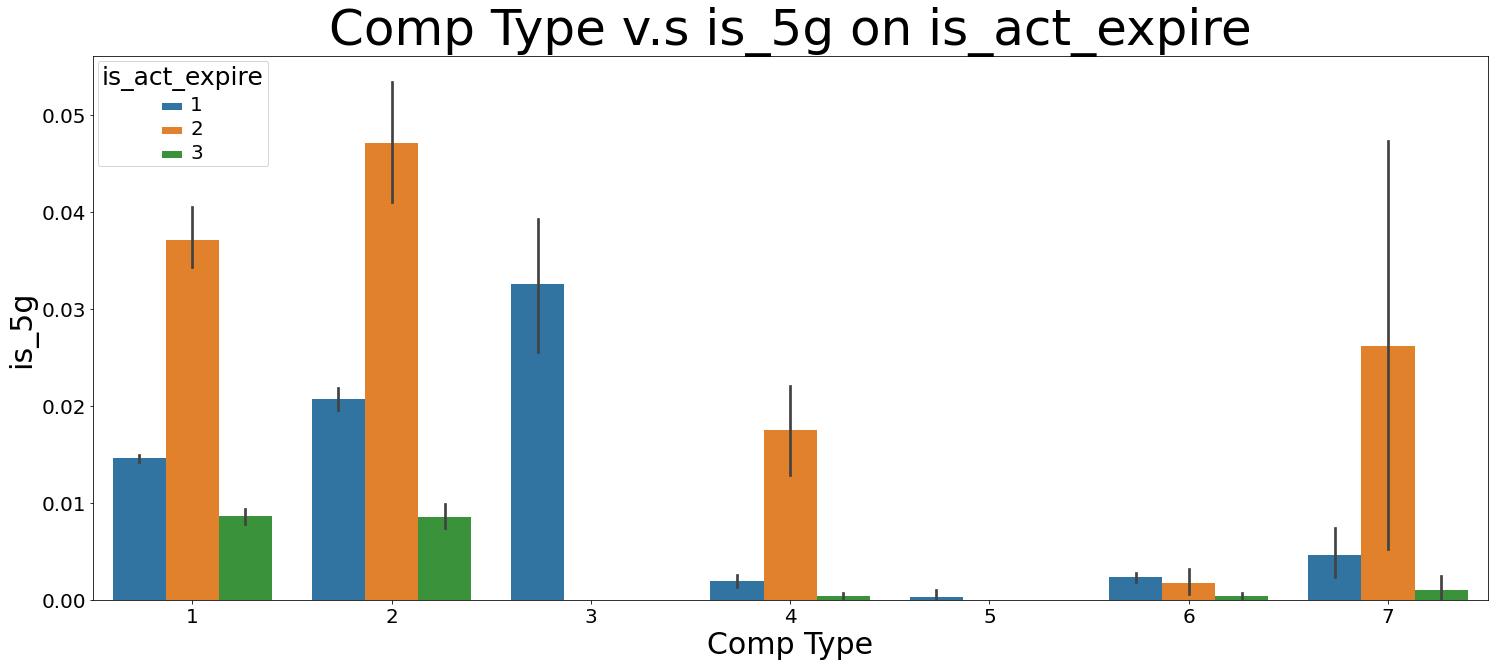

In [23]:
plt.figure(figsize=[25,10])
b=sb.barplot(x="comp_type", y="is_5g", hue='is_act_expire', data=df_train)
b.axes.set_title("Comp Type v.s is_5g on is_act_expire",fontsize=50)
b.set_xlabel("Comp Type",fontsize=30)
b.set_ylabel("is_5g",fontsize=30)
b.tick_params(labelsize=20)
plt.setp(b.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(b.get_legend().get_title(), fontsize='25'); # for legend title

**is_act_expire 2** is the most common accross all comp types in terms of 5g prob.

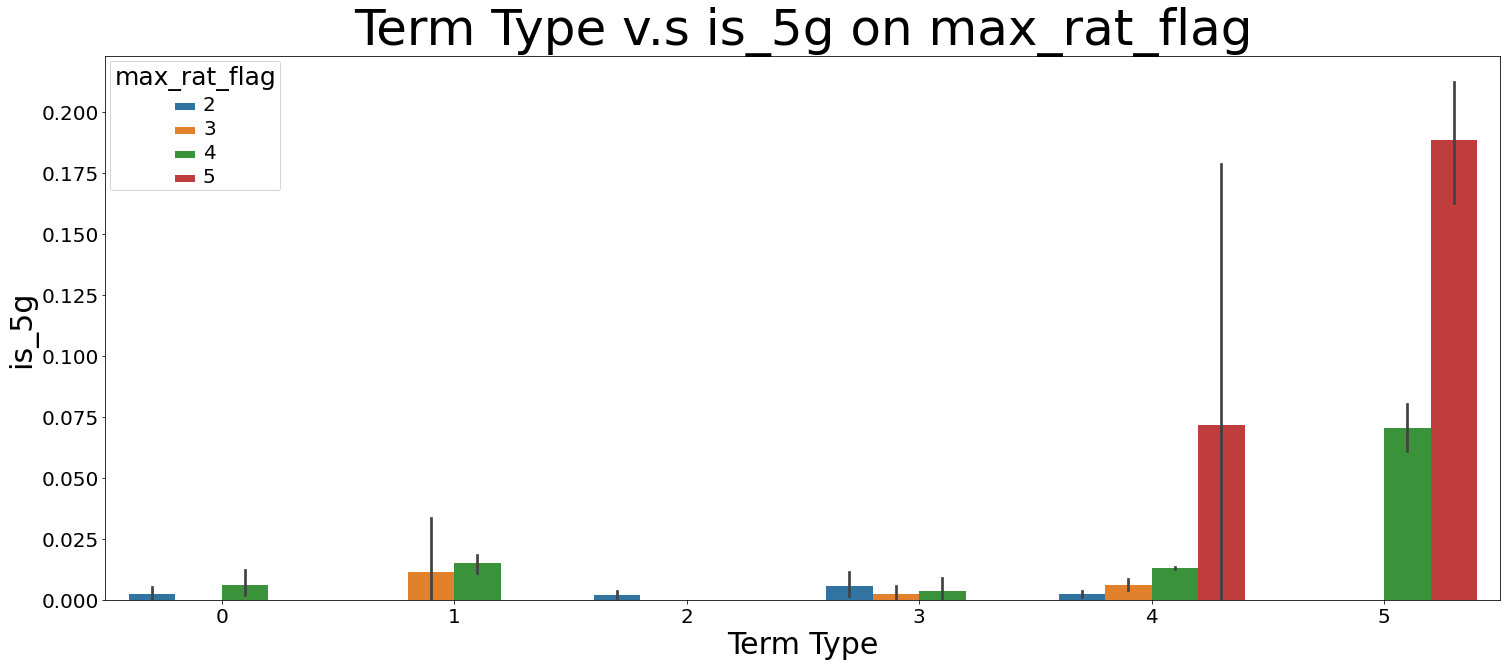

In [24]:
plt.figure(figsize=[25,10])
b=sb.barplot(x="term_type", y="is_5g", hue='max_rat_flag', data=df_train)
b.axes.set_title("Term Type v.s is_5g on max_rat_flag",fontsize=50)
b.set_xlabel("Term Type",fontsize=30)
b.set_ylabel("is_5g",fontsize=30)
b.tick_params(labelsize=20)
plt.setp(b.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(b.get_legend().get_title(), fontsize='25'); # for legend title

**max_rat_flag 2** is the most common one across each term type over is_5g col.

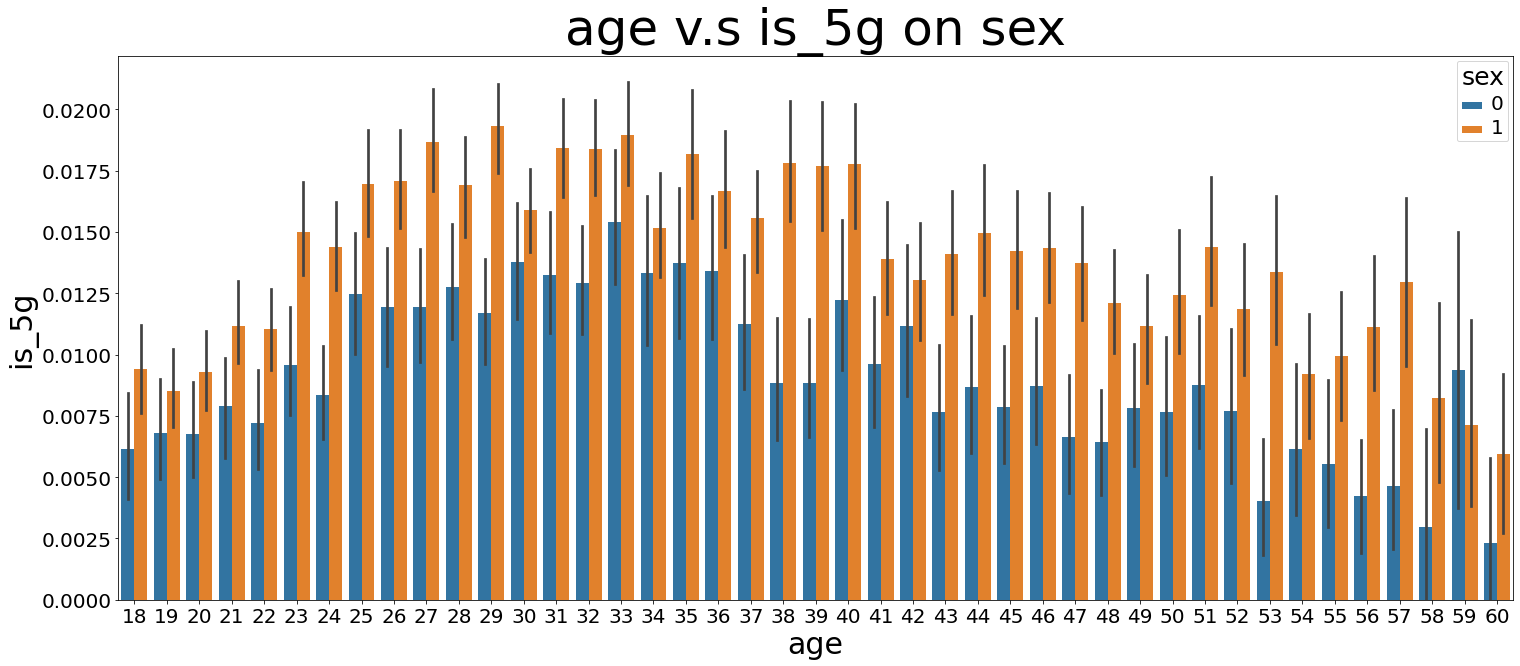

In [25]:
plt.figure(figsize=[25,10])
b=sb.barplot(x="age", y="is_5g", hue='sex', data=df_train)
b.axes.set_title("age v.s is_5g on sex",fontsize=50)
b.set_xlabel("age",fontsize=30)
b.set_ylabel("is_5g",fontsize=30)
b.tick_params(labelsize=20)
plt.setp(b.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(b.get_legend().get_title(), fontsize='25'); # for legend title

The **age** column will be out of interest since it contains 43 and all of them having the sex 1 is higher than sex 0 except age of **59**. So it doesn't give any additional information to predict **is_5g**

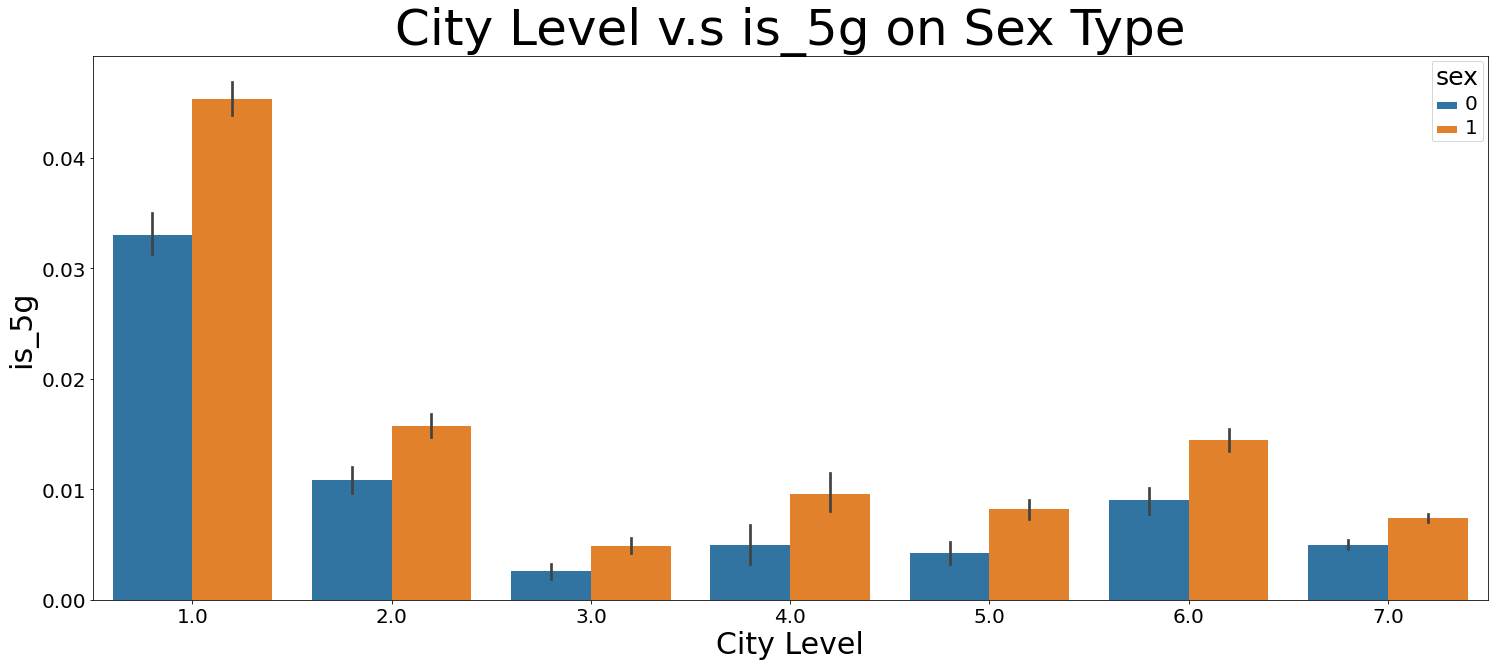

In [26]:
plt.figure(figsize=[25,10])
b=sb.barplot(x="city_level", y="is_5g", hue='sex', data=df_train)
b.axes.set_title("City Level v.s is_5g on Sex Type",fontsize=50)
b.set_xlabel("City Level",fontsize=30)
b.set_ylabel("is_5g",fontsize=30)
b.tick_params(labelsize=20)
plt.setp(b.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(b.get_legend().get_title(), fontsize='25'); # for legend title

**City Level 1** is the most common level and sex type 1 is always dominant accross each city level in terms of 5g pred

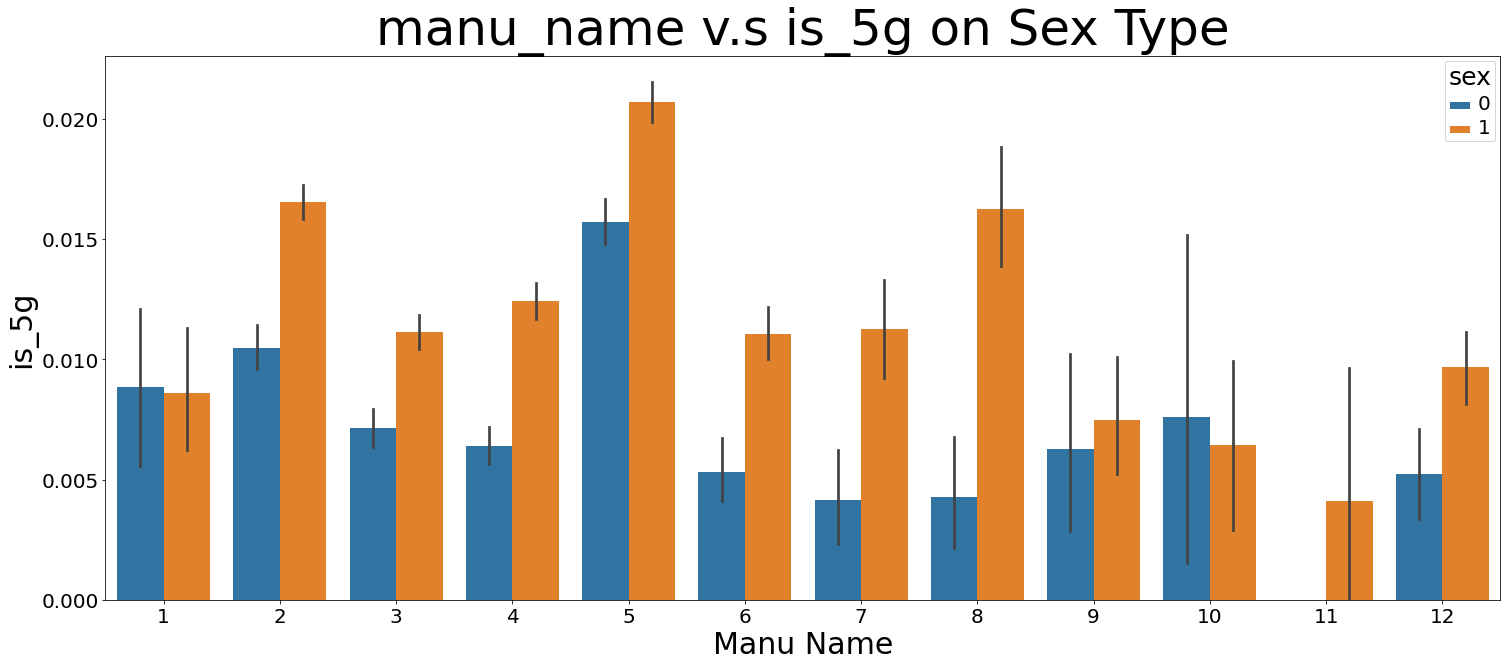

In [27]:
plt.figure(figsize=[25,10])
b=sb.barplot(x="manu_name", y="is_5g", hue='sex', data=df_train)
b.axes.set_title("manu_name v.s is_5g on Sex Type",fontsize=50)
b.set_xlabel("Manu Name",fontsize=30)
b.set_ylabel("is_5g",fontsize=30)
b.tick_params(labelsize=20)
plt.setp(b.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(b.get_legend().get_title(), fontsize='25'); # for legend title

**manu name 5** is the most common one in each manu name in terms of is_5g. For sex 1 it is higher (as usual).

**To conclude what we have just done, our area of interest which will be used in our model is consisting of :**
***'user_id','prov_id', 'chnl_type', 'service_type', 'product_type', 'sex','activity_type','manu_name', 'term_type', 'max_rat_flag', 'is_5g_base_cover','is_work_5g_cover', 'is_home_5g_cover', 'is_work_5g_cover_l01','is_home_5g_cover_l01', 'is_work_5g_cover_l02', 'is_home_5g_cover_l02','is_act_expire', 'comp_type', 'city_5g_ratio', 'city_level', 'is_5g'***

In [28]:
df_train_area_of_interest = ['user_id','prov_id', 'chnl_type', 'service_type', 'product_type','activity_type','sex','manu_name', 'term_type', 'max_rat_flag', 'is_5g_base_cover','is_work_5g_cover', 'is_home_5g_cover', 'is_work_5g_cover_l01','is_home_5g_cover_l01', 'is_work_5g_cover_l02', 'is_home_5g_cover_l02','is_act_expire', 'comp_type', 'city_5g_ratio', 'city_level', 'is_5g']

In [29]:
df_test_area_of_interest = df_train_area_of_interest.copy()
df_test_area_of_interest.remove('is_5g')

# **Data Predictions**

Since we are dealing with a real world problem, I will use a **validation set** so our sets will be [Train Data, Validation Data, Test Data] to refine the "tuning" of each model.

In [30]:
df_train = df_train[df_train_area_of_interest]
df_test = df_test[df_test_area_of_interest]

In [31]:
df_train.head()

,user_id,prov_id,chnl_type,service_type,product_type,activity_type,sex,manu_name,term_type,max_rat_flag,...,is_home_5g_cover,is_work_5g_cover_l01,is_home_5g_cover_l01,is_work_5g_cover_l02,is_home_5g_cover_l02,is_act_expire,comp_type,city_5g_ratio,city_level,is_5g
0,5f950e1751acd6a6fa9bf88eb5560c78,81,7,4,5,4,1,3,4,4,...,0,0,0,0,0,1,1,0.000512,7.0,1.0
1,40015dd14b779d1d3d4e8e2536c6115a,36,7,4,3,4,1,6,4,4,...,0,0,0,0,0,1,1,0.000356,3.0,0.0
2,72f4ddd94488cc2f30bc83b82f55d3eb,76,7,4,4,3,0,5,4,4,...,1,1,1,1,1,2,6,0.000490,3.0,0.0
3,845983a3e7973b0016c73071f4c70c1c,84,10,4,5,5,0,1,1,4,...,0,0,0,0,0,3,6,0.000328,2.0,0.0
4,0326fbd12145c5378baf5168a8e9c8fe,85,7,4,3,4,1,6,4,4,...,0,0,0,0,0,1,1,0.000830,6.0,0.0


In [32]:
df_test.head()

,user_id,prov_id,chnl_type,service_type,product_type,activity_type,sex,manu_name,term_type,max_rat_flag,...,is_work_5g_cover,is_home_5g_cover,is_work_5g_cover_l01,is_home_5g_cover_l01,is_work_5g_cover_l02,is_home_5g_cover_l02,is_act_expire,comp_type,city_5g_ratio,city_level
0,32cd3ea929129a5af90579eb444958fa,81,9,4,3,4,1,3,4,4,...,0,0,0,0,0,0,1,1,0.000644,2.0
1,e25355ae12b4ebab4427eef6719a5ade,10,9,4,3,4,1,3,4,4,...,0,0,0,0,0,0,1,2,0.000169,6.0
2,8a3aca94fcc94eb833b8a0be20ca9b0f,91,10,1,2,4,1,2,4,2,...,0,0,0,0,0,0,1,4,0.000121,7.0
3,2f14bfc318552928e6ae2b6f2c54985f,71,7,4,4,4,1,3,4,4,...,0,0,0,0,0,0,1,1,0.000276,7.0
4,5ca81abebce497ab2063a87658e48798,76,9,4,3,4,1,2,4,4,...,0,0,0,0,0,1,1,1,0.000129,7.0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [34]:
train_user_id=df_train['user_id']

In [35]:
test_user_id=df_test['user_id']

In [36]:
x = df_train.drop(columns=['user_id','is_5g'])
y = df_train['is_5g']

In [37]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.25, random_state=42)

In [38]:
x_test = df_test.drop('user_id',axis=1)
y_test = df_sample['is_5g']

In [39]:
x_train.shape,x_validation.shape,x_test.shape,y_train.shape,y_validation.shape,y_test.shape

((525000, 20), (175000, 20), (300000, 20), (525000,), (175000,), (300000,))

Since we are dealing with a basic binary classification problem 1 or 0, so lets implement the **logistic regression**.

In [42]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
pred = model1.predict(x_validation)
print(classification_report(y_validation,pred))

d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricW

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    172682
         1.0       0.00      0.00      0.00      2318

    accuracy                           0.99    175000
   macro avg       0.49      0.50      0.50    175000
weighted avg       0.97      0.99      0.98    175000



d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
pred_test1 = model1.predict(x_test)
print(classification_report(y_test,pred_test1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    300000

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



Now lets try another classifier **Decision Tree** but using this classifier it is recommended to reorder the columns by its weight effect on the decision (from lowest entropy to highest) but this step is optional here since we are dealing with low entropy columns.

In [44]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
pred = model2.predict(x_validation)
print(classification_report(y_validation, pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    172682
         1.0       0.08      0.04      0.05      2318

    accuracy                           0.98    175000
   macro avg       0.53      0.52      0.52    175000
weighted avg       0.98      0.98      0.98    175000



In [45]:
pred_test2 = model2.predict(x_test)
print(classification_report(y_test,pred_test2))

d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    300000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.99    300000
   macro avg       0.50      0.50      0.50    300000
weighted avg       1.00      0.99      1.00    300000



d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest**

In [46]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)
pred = model3.predict(x_validation)
print(classification_report(y_validation, pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    172682
         1.0       0.12      0.02      0.03      2318

    accuracy                           0.99    175000
   macro avg       0.55      0.51      0.51    175000
weighted avg       0.98      0.99      0.98    175000



In [47]:
pred_test3 = model3.predict(x_test)
print(classification_report(y_test,pred_test3))

d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    300000
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    300000
   macro avg       0.50      0.50      0.50    300000
weighted avg       1.00      1.00      1.00    300000



d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It does not need any hyperparameter tuning lets move on to the **XGB**

In [48]:
import xgboost
model4 = xgboost.XGBClassifier()
model4.fit(x_train,y_train)
pred = model4.predict(x_validation)
print(classification_report(y_validation, pred))

d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    172682
         1.0       0.33      0.00      0.01      2318

    accuracy                           0.99    175000
   macro avg       0.66      0.50      0.50    175000
weighted avg       0.98      0.99      0.98    175000



In [49]:
pred_test4 = model4.predict(x_test)
print(classification_report(y_test,pred_test4))

d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    300000
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    300000
   macro avg       0.50      0.50      0.50    300000
weighted avg       1.00      1.00      1.00    300000



d:\users\lupo\anaconda3\envs\data_analysis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Models Comparison

In [52]:
model_compare= pd.DataFrame(list(zip(df_sample['is_5g'],pred_test1, pred_test2, pred_test3, pred_test4)),
               columns =['ActualSet','LogisticRegression','DecisionTree','RandomForest','XGB'])

In [97]:
population=model_compare.shape[0]

In [98]:
elements,count=\
np.unique(np.where(model_compare['LogisticRegression'] == model_compare['ActualSet'],True,False),return_counts=True)
print('Count Of Correct And False: Logistic Regression')
print('Correct Predictions: {} - False Predictions: {}'.format(count[0],count[0]-model_compare['LogisticRegression'].shape[0]))
correct1=count[0]*100/population

Count Of Correct And False: Logistic Regression
Correct Predictions: 300000 - False Predictions: 0


In [100]:
elements,count=\
np.unique(np.where(model_compare['DecisionTree'] == model_compare['ActualSet'],True,False),return_counts=True)
print('Count Of Correct And False: Decision Tree')
print('Correct Predictions: {} - False Predictions: {}'.format(count[1], count[0]))
correct2=count[1]*100/population

Count Of Correct And False: Decision Tree
Correct Predictions: 298016 - False Predictions: 1984


In [101]:
elements,count=\
np.unique(np.where(model_compare['RandomForest'] == model_compare['ActualSet'],True,False),return_counts=True)
print('Count Of Correct And False: Random Forest')
print('Correct Predictions: {} - False Predictions: {}'.format(count[1], count[0]))
correct3=count[1]*100/population

Count Of Correct And False: Random Forest
Correct Predictions: 299414 - False Predictions: 586


In [102]:
elements,count=\
np.unique(np.where(model_compare['XGB'] == model_compare['ActualSet'],True,False),return_counts=True)
print('Count Of Correct And False: XGBoost')
print('Correct Predictions: {} - False Predictions: {}'.format(count[1], count[0]))
correct4=count[1]*100/population

Count Of Correct And False: XGBoost
Correct Predictions: 299944 - False Predictions: 56


In [145]:
acc={'Logistic Regression':correct1,'Decision Tree':correct2,'Random Forest':correct3,'XGBoost':correct4}

In [146]:
acc=sorted(acc.items(),key=lambda x: x[1], reverse=True)

In [149]:
acc=dict(acc)

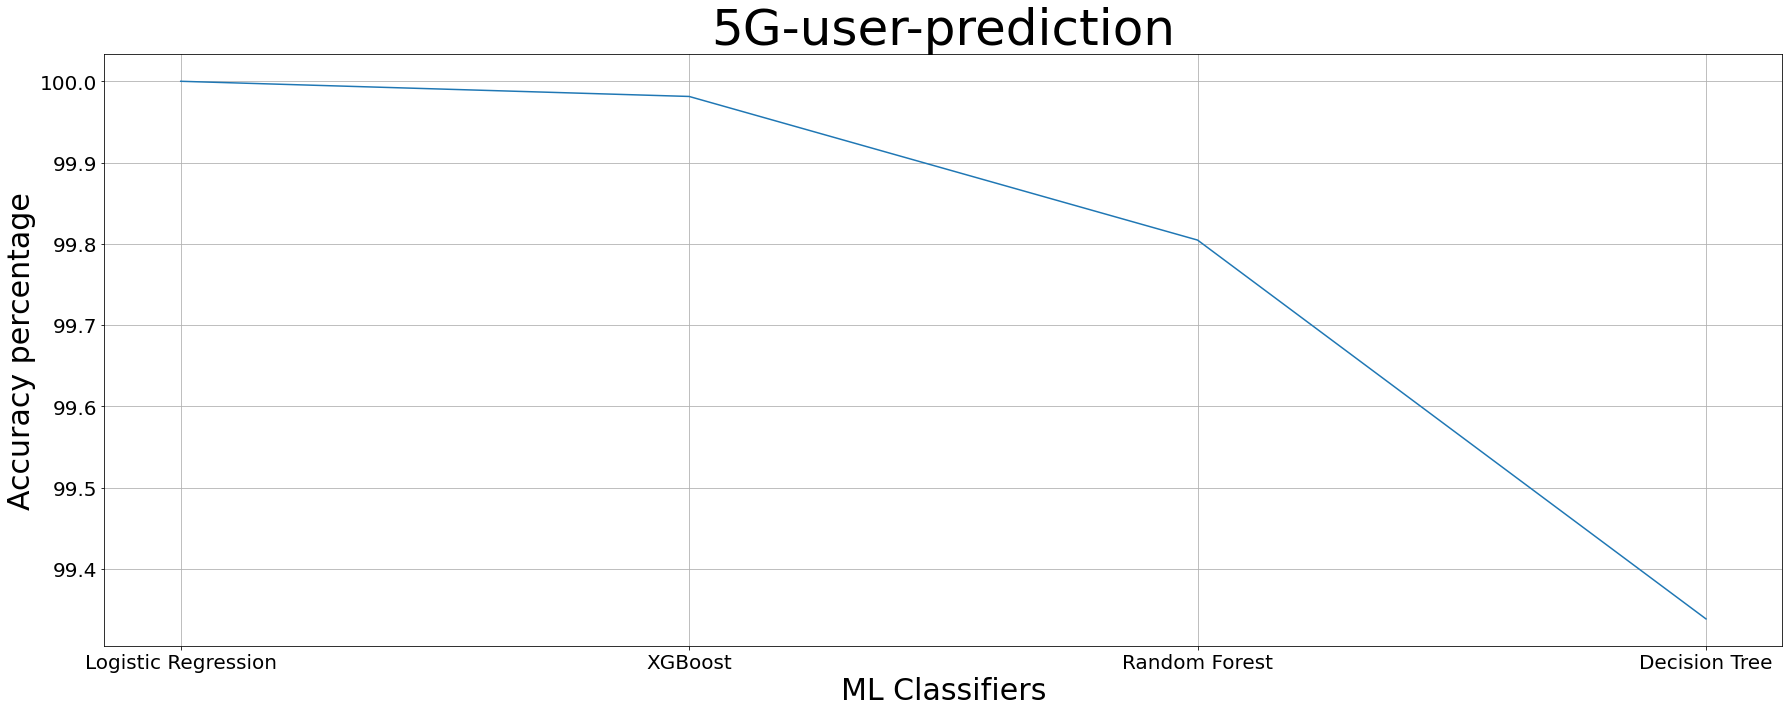

In [152]:
plt.figure(figsize=[25,10])
plt.plot(acc.keys(), acc.values())
plt.ylabel('Accuracy percentage',fontsize=30)
plt.xlabel('ML Classifiers',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('5G-user-prediction',fontsize=50)
plt.grid()
plt.tight_layout()

## Conclusion

We have found that using the linear regression the model could achieve 100% since the features or columns have very low entropy which helped the 4 models to have 99% to 100% accuracy.